# Comparison of Different Optimizers for QAOA on a Max Cut instance
In this notebook different optimizers for the QAOA parameters are compared. The approximation ratios obtained by using the different optimizers are compared, as well as the value of the QAOA parameters. 

## 1. Install and import the python [QAOA package](https://github.com/OpenQuantumComputing/QAOA) if needed



In [1]:
import subprocess
import sys

try:
    from qaoa import QAOA, initialstates, mixers, problems

    print("qaoa is already installed.")
except ImportError:
    print("qaoa is not installed. Installing now...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "qaoa"])
    from qaoa import QAOA, initialstates, mixers, problems

qaoa is already installed.


In [2]:
import networkx as nx
from plotroutines import plot_ApproximationRatio
from qiskit_algorithms.optimizers import COBYLA

## 2. Create Barabási–Albert graph instance, more examples can be found here https://github.com/OpenQuantumComputing/data

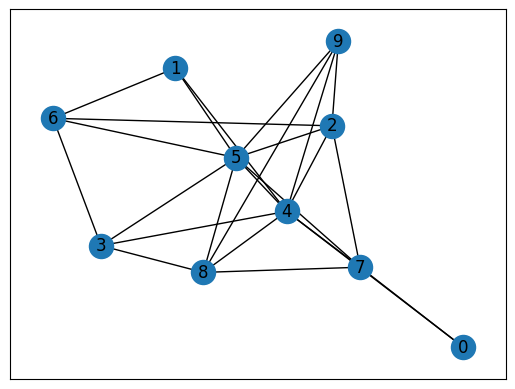

In [3]:
G = nx.read_gml("data/w_ba_n10_k4_0.gml")
nx.draw_networkx(G)
mincost = -8.657714089848158  # precalculated

## 3. Create a QAOA instance
 - the initial state as the uniform superposition
 - the problem is the MaxCut of the graph G
 - the mixer is the standard X mixer

In [4]:
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
    optimizer=[COBYLA, {"maxiter": 100, "tol": 1e-6}],
)

## 4.1 draw the circuit for the initial state

In [5]:
qaoa.createParameterizedCircuit(1)
qaoa.initialstate.circuit.draw()

┌───┐
q3_0: ┤ H ├
      ├───┤
q3_1: ┤ H ├
      ├───┤
q3_2: ┤ H ├
      ├───┤
q3_3: ┤ H ├
      ├───┤
q3_4: ┤ H ├
      ├───┤
q3_5: ┤ H ├
      ├───┤
q3_6: ┤ H ├
      ├───┤
q3_7: ┤ H ├
      ├───┤
q3_8: ┤ H ├
      ├───┤
q3_9: ┤ H ├
      └───┘

## 4.2 draw the circuit for the problem

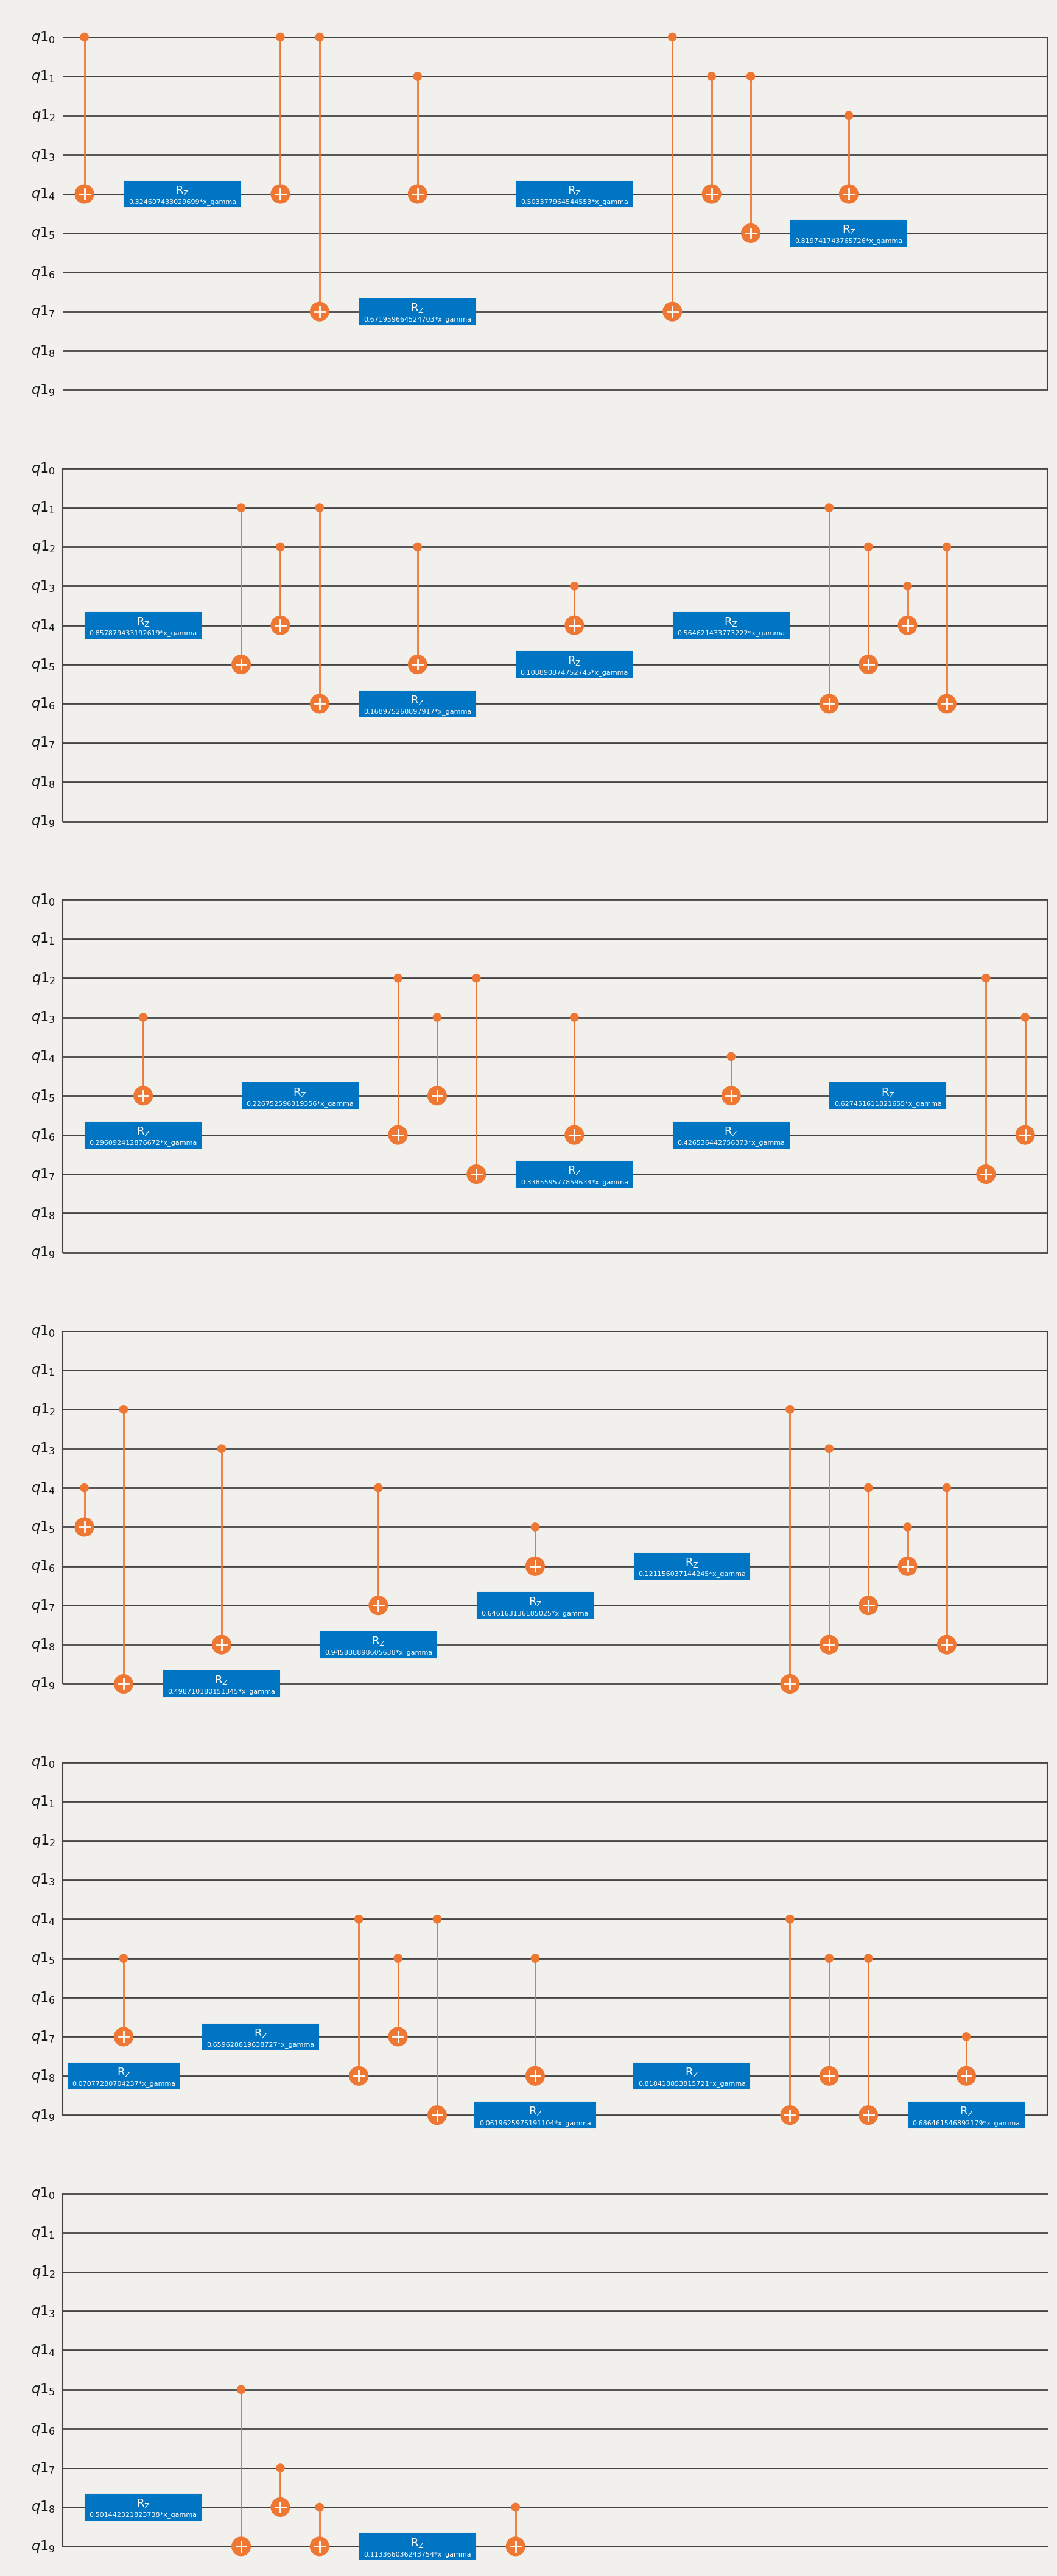

In [6]:
qaoa.problem.circuit.draw("mpl")

## 4.3 draw the circuit for the mixer

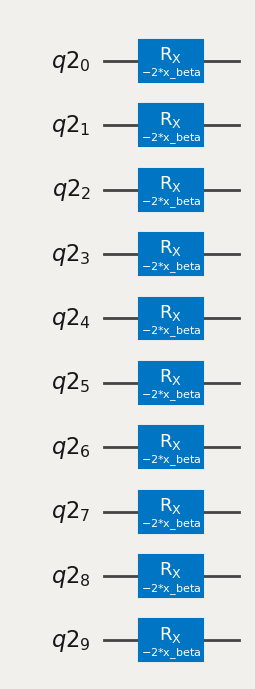

In [7]:
qaoa.mixer.circuit.draw("mpl")

### 5. Run optimization to depth = 10

In [8]:
maxdepth = 10
qaoa.optimize(depth=maxdepth)

2024-08-26 09:14:34 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2024-08-26 09:14:34 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2024-08-26 09:14:34 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2024-08-26 09:14:34 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2024-08-26 09:14:38 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2024-08-26 09:14:38 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2024-08-26 09:14:39 [info     ] cost(depth 1 = -6.895188047716615 file=qaoa.qaoa func=optimize
2024-08-26 09:14:40 [info     ] cost(depth 2 = -7.294962636367336 file=qaoa.qaoa func=optimize
2024-08-26 09:14:42 [info     ] cost(depth 3 = -7.369124612119966 file=qaoa.qaoa func=optimize
2024-08-26 09:14:44 [info     ] cost(depth 4 = -7.869464742753

## 6. Below the approximation ratios are plotted for the different optimizers. From the figure we see that the different optimizers give roughly the same approximation ratio.

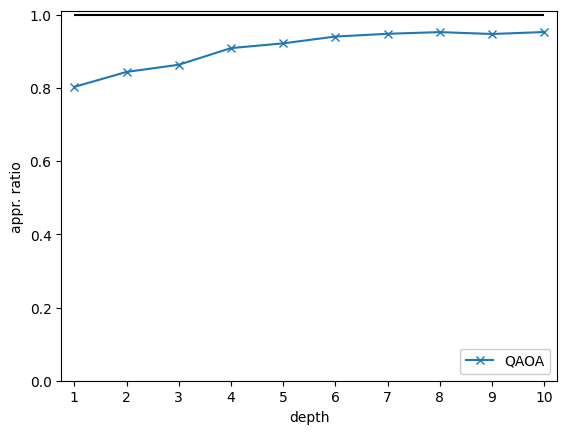

In [9]:
plot_ApproximationRatio(
    qaoa, maxdepth, mincost=mincost, maxcost=0, label="QAOA", style="x-"
)